In [1]:
import numpy as np
import pylab as plt
import networkx as nx
import scipy.integrate as integ
from scipy.linalg import null_space
import math

from utils import *

%matplotlib inline

In [2]:
def simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0):#, weights_n, weights_e, weights_f):
    return omega_0-a*(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.sin(B1.dot(theta)))
#     return omega_0-a*np.diag(we).dot(B0.dot(np.sin(B0.T.dot(theta))))-a*B1.T.dot(np.diag(wf).dot(np.sin(B1.dot(theta))))

def integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0):#, weights_n, weights_e, weights_f):
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)
#     return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta(t, theta, B0, B1, a, omega_0, degree, weights_n, weights_e, weights_f), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

In [3]:
def ntri(A):
    # signed incidence matrices for triangles
    Nn=A.shape[0]
    Ne=int(np.sum(A)/2)
    #print Nn, Ne

    e=np.zeros((Ne,2))
    count=0;
    for i in range(Nn):
        for j in range(i+1,Nn):
            if(A[i,j]>0):
                e[count,0]=i
                e[count,1]=j
                count+=1
    print "edges"
    print e
    I=np.zeros((Ne,Nn))
    for i in range(Ne):
        I[i,int(e[i,0])]=1
        I[i,int(e[i,1])]=-1
    #print I

    Nf=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    Nf+=1
    f=np.zeros((Nf,3))
    count=0
    for i in range(Nn):
        for j in range(i+1,Nn):
            for k in range(j+1,Nn):
                subA=A[np.ix_([i,j,k],[i,j,k])]
                if(np.sum(subA)==6):
                    f[count,0]=i
                    f[count,1]=j
                    f[count,2]=k
                    count+=1
    print "faces"
    print f
    II=np.zeros((Nf,Ne))
    for i in range(f.shape[0]):
        for j in [0,-1,-2]:
            temp=np.roll(f[i,:],j)
            temp=temp[0:2]
            for k in range(e.shape[0]):
                #print e[k,:],temp
                if(((e[k,:]==temp).all())or((e[k,:]==np.roll(temp,1)).all())):
                    Irow=k
            if(temp[0]<temp[1]):
                II[i,Irow]=1
            else:
                II[i,Irow]=-1
    #print II 
    ntrie=np.sum(II,1)
    return I,II#,ntrie, e#, len(ntrie)

In [16]:
def plotflow(theta_0,B0,B1,plotname):
    print(plotname)
    omega_0=np.ones(B0.shape[0])*0
    degree=np.absolute(B0).sum(0)
    a=1
    t_max = 110 #integration time
    n_t = 200 #number of timepoints 

    result=integrate_simplicial_kuramoto_full_theta(B0, B1, theta_0, t_max, n_t, a, omega_0)
    times = result.t
    theta = result.y
    
    plt.figure()
    plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
    plt.title(plotname+' phases')
    plt.colorbar()
    
    op=order_parameter(theta, 4, 1)
    plt.figure()
    plt.title(plotname+' order parameter')
    plt.plot(op[0,:])

    print('\theta_0: ', theta_0)
    print('\theta_final: ',theta[:,-1])
    print('\theta_final: ',np.mod(np.around(theta[:,-1],10),np.around(2*np.pi,10)))
    
    Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
    Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))
    print('Div: ', Div[:,-1])
    print('Curl: ', Curl[:,-1])
    
    L1=-B0.dot(B0.T)-B1.T.dot(B1)
    print('L1\theta: ', L1.dot(theta[:,-1]))
    print('L1\theta: ', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
    print('dim(Ker(L1)): ', null_space(L1).shape[1])
    print('Ker(L1): ', null_space(L1))
    
#     plt.figure()
#     plt.imshow(Div, aspect='auto',cmap='bwr')
#     plt.title(plotname+' divergence')
#     plt.colorbar()
#     plt.figure()
#     plt.imshow(Curl, aspect='auto',cmap='bwr')
#     plt.title(plotname+' curl')
#     plt.colorbar()
    return theta[:,-1]

edges
[[0. 1.]
 [0. 3.]
 [1. 2.]
 [2. 3.]]
faces
[]
One opposite orientation
('\theta_0: ', array([5.23169556, 6.05946316, 1.50616264, 0.51391514]))
('\theta_final: ', array([6.58126285, 5.98510776, 0.29807755, 0.29807755]))
('\theta_final: ', array([0.29807755, 5.98510776, 0.29807755, 0.29807755]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([-18.84955592, -18.84955592,   6.28318531,  -6.28318531]))
('L1\theta: ', array([1.00001785e-10, 1.00001785e-10, 0.00000000e+00, 0.00000000e+00]))
('dim(Ker(L1)): ', 1)
('Ker(L1): ', array([[-0.5],
       [ 0.5],
       [-0.5],
       [-0.5]]))
All same orientations
('\theta_0: ', array([5.23169556, 6.05946316, 1.50616264, 0.51391514]))
('\theta_final: ', array([6.46940178, 6.46940178, 0.18621647, 0.18621647]))
('\theta_final: ', array([0.18621647, 0.18621647, 0.18621647, 0.18621647]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([-6.28318531, -6.28318

array([6.43222408, 6.43222408, 0.14903877, 0.14903877])

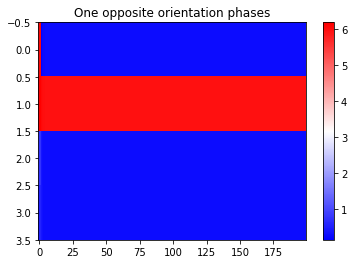

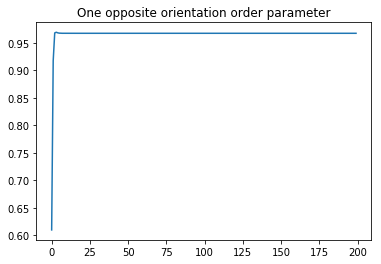

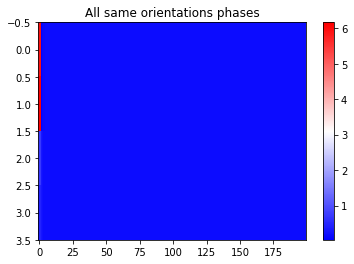

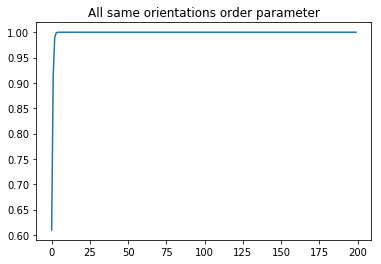

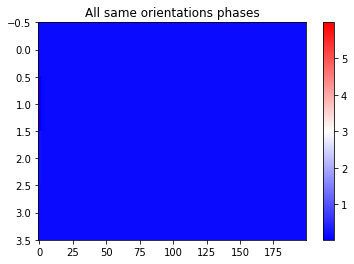

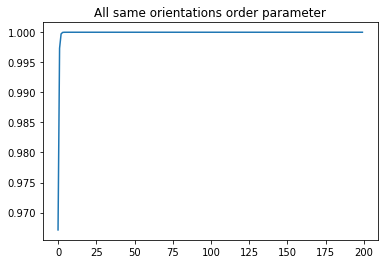

In [18]:
# cycle graph
Nn=4

G=nx.cycle_graph(Nn)

A=nx.to_numpy_matrix(G)

B0,B1=ntri(A)

Nn=B0.shape[1]
Ne=B0.shape[0]
Nf=B1.shape[0]

# inital conditions
# np.random.seed(seed=4444)
theta_0=2*np.pi*np.random.rand(Ne)
# theta_0=(np.random.rand(Ne)-0.5)*10

# stationary eigenvector info in Ker(L1), change of orientation makes them consistent
theta_final=plotflow(theta_0,B0,B1,'One opposite orientation')

# reverse the orientation of the odd one out
B0[1,0]=-B0[1,0]
B0[1,-1]=-B0[1,-1]

plotflow(theta_0,B0,B1,'All same orientations')
plotflow(theta_final,B0,B1,'All same orientations') #to check that the stationary state with the odd one out is unstable for the all the same

1++ 3+-, d+
1++ 3+-, d+
('\theta_0: ', array([-2.08142124,  4.0552755 ,  3.11490827, -2.23853913,  3.43983545]))
('\theta_final: ', array([-0.78539816,  2.35619449,  5.49778714, -2.35619449,  4.71238898]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([0., 0.]))
('L1\theta: ', array([ 1.15463195e-14, -6.28318531e+00, -1.88495559e+01,  1.25663706e+01,
       -1.88495559e+01]))
('L1\theta: ', array([0.00000000e+00, 0.00000000e+00, 1.00001785e-10, 0.00000000e+00,
       1.00001785e-10]))
('dim(Ker(L1)): ', 0)
('Ker(L1): ', array([], shape=(5, 0), dtype=float64))
1+- 3+-, d+
1+- 3+-, d+
('\theta_0: ', array([-2.08142124,  4.0552755 ,  3.11490827, -2.23853913,  3.43983545]))
('\theta_final: ', array([-1.48040902e-04,  6.28275341e+00,  6.28307031e+00, -3.35499225e-04,
        6.28296481e+00]))
('Div: ', array([6.33579000e-05, 3.30430000e-05, 0.00000000e+00, 6.28308891e+00]))
('Curl: ', array([6.28314277e+00, 1.24100400e-04]))
('L1\theta: ', array([  6.28319753,  -6.28314965, -18.849546

array([-0.78539816,  2.35619449,  0.78539816, -2.35619449,  4.71238898])

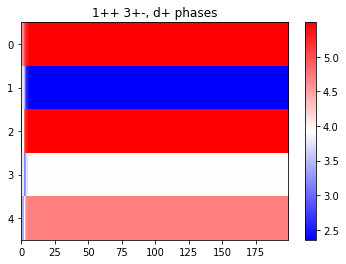

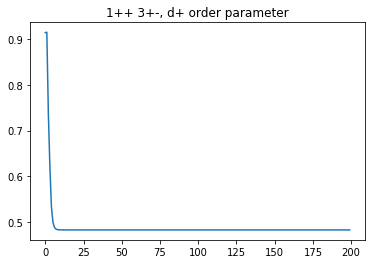

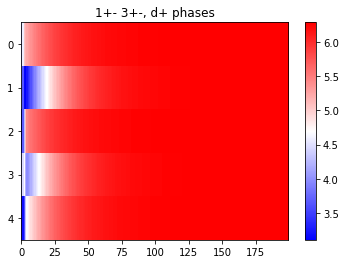

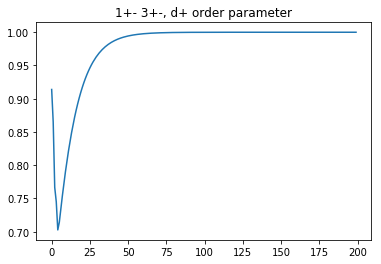

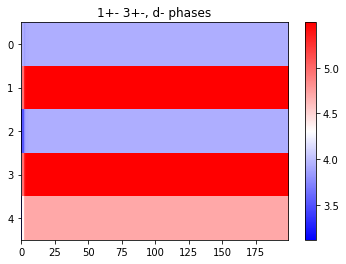

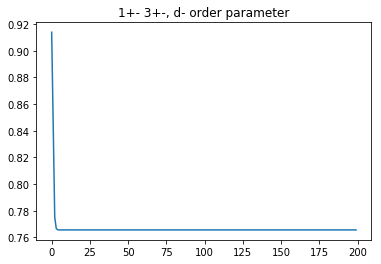

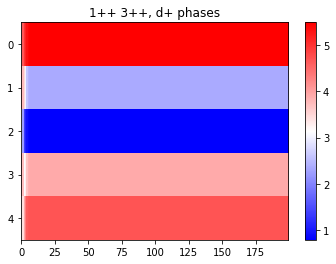

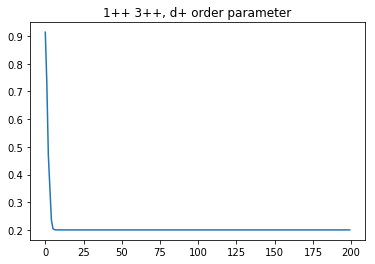

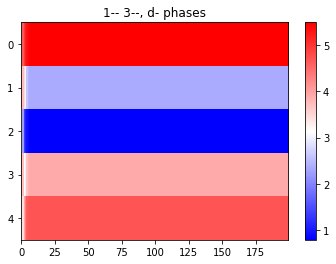

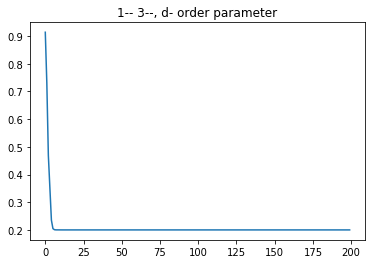

In [6]:
# cycle graph with diagonal
Nn=4
Ne=5
Nf=2

# np.random.seed(seed=4444)

# theta_0=np.pi*np.random.rand(Ne)
theta_0=(np.random.rand(Ne)-0.5)*10

# +- diag +
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[1, 0, 0, -1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[1, 0, -1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, 1, 0, -1] #e135 (n123)
B1[1,:]=[0, 1, 0, -1, -1] #e245 (n134)
print('1++ 3+-, d+')
plotflow(theta_0,B0,B1,'1++ 3+-, d+')

# # +- diag +
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[-1, 0, 0, 1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[1, 0, -1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, 1, 0, -1] #e135 (n123)
B1[1,:]=[0, 1, 0, -1, -1] #e245 (n134)
print('1+- 3+-, d+')
plotflow(theta_0,B0,B1,'1+- 3+-, d+')

# +- diag -
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[-1, 0, 0, 1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[-1, 0, 1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, 1, 0, 1] #135
B1[1,:]=[0, 1, 0, 1, -1] #245
print('1+- 3+-, d-')
plotflow(theta_0,B0,B1,'1+- 3+-, d-')

# ++(1) diag +
B0=np.zeros((Ne,Nn))
B0[0,:]=[1, -1, 0, 0]
B0[1,:]=[1, 0, 0, -1]
B0[2,:]=[0, -1, 1, 0]
B0[3,:]=[0, 0, 1, -1]
B0[4,:]=[1, 0, -1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[1, 0, -1, 0, -1] #135
B1[1,:]=[0, -1, 0, 1, 1] #245
print('1++ 3++, d+')
plotflow(theta_0,B0,B1,'1++ 3++, d+')

# ++(1) diag -
# B0=np.zeros((Ne,Nn))
# B0[0,:]=[1, -1, 0, 0]
# B0[1,:]=[1, 0, 0, -1]
# B0[2,:]=[0, -1, 1, 0]
# B0[3,:]=[0, 0, 1, -1]
# # B0[4,:]=[-1, 0, 1, 0]
# B1=np.zeros((Nf,Ne))
# B1[0,:]=[1, 0, -1, 0, 1] #135
# B1[1,:]=[0, -1, 0, 1, -1] #245
# print('1++ 3++, d-')
# plotflow(theta_0,B0,B1,1++ 3++, d-')

# --(1) diag +
# B0=np.zeros((Ne,Nn))
# B0[0,:]=[-1, 1, 0, 0]
# B0[1,:]=[-1, 0, 0, 1]
# B0[2,:]=[0, 1, -1, 0]
# B0[3,:]=[0, 0, -1, 1]
# B0[4,:]=[1, 0, -1, 0]
# B1=np.zeros((Nf,Ne))
# B1[0,:]=[-1, 0, 1, 0, -1] #135
# B1[1,:]=[0, 1, 0, -1, 1] #245
# print('1-- 3--, d+')
# plotflow(theta_0,B0,B1,'1-- 3--, d+')

# --(1) diag -
B0=np.zeros((Ne,Nn))
B0[0,:]=[-1, 1, 0, 0]
B0[1,:]=[-1, 0, 0, 1]
B0[2,:]=[0, 1, -1, 0]
B0[3,:]=[0, 0, -1, 1]
B0[4,:]=[-1, 0, 1, 0]
B1=np.zeros((Nf,Ne))
B1[0,:]=[-1, 0, 1, 0, 1] #135
B1[1,:]=[0, 1, 0, -1, -1] #245
print('1-- 3--, d-')
plotflow(theta_0,B0,B1,'1-- 3--, d-')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:511: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:532: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:712: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


Siamese cycles
('\theta_0: ', array([1.26867563, 0.35254452, 0.21283991, 0.6180573 , 0.29850341,
       3.08746969, 0.04238613]))
('\theta_final: ', array([ 1.31165855,  0.6343716 ,  0.6343716 ,  0.6343716 ,  1.31165855,
        1.31165855, -0.67728695]))
('\theta_final: ', array([1.31165855, 0.6343716 , 0.6343716 , 0.6343716 , 1.31165855,
       1.31165855, 5.60589836]))
('Div: ', array([0., 0., 0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([-2.04281037e-14, -2.09832152e-14,  0.00000000e+00,  2.05391260e-14,
        2.13162821e-14, -4.44089210e-16,  2.22044605e-16]))
('L1\theta: ', array([0., 0., 0., 0., 0., 0., 0.]))
('dim(Ker(L1)): ', 2)
('Ker(L1): ', array([[ 0.45644438, -0.24150609],
       [ 0.34794836,  0.38157385],
       [ 0.34794836,  0.38157385],
       [ 0.34794836,  0.38157385],
       [ 0.45644438, -0.24150609],
       [ 0.45644438, -0.24150609],
       [-0.10849602,  0.62307994]]))


array([ 1.31165855,  0.6343716 ,  0.6343716 ,  0.6343716 ,  1.31165855,
        1.31165855, -0.67728695])

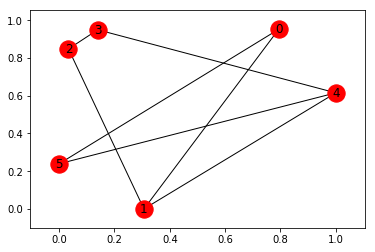

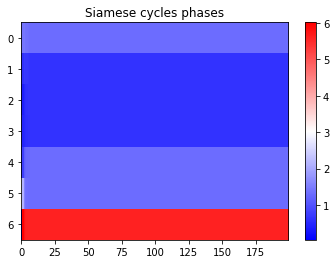

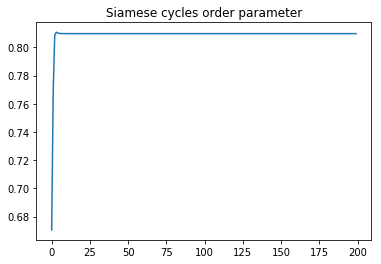

In [19]:
# 00 siamese cycles (they share an edge), one orientation, shared edge tbd
Nn=6
Ne=7

B0=np.zeros((Ne,Nn))
B0[0,:]=[-1, 1, 0, 0, 0, 0]
B0[1,:]=[0, -1, 1, 0, 0, 0]
B0[2,:]=[0, 0, -1, 1, 0, 0]
B0[3,:]=[0, 0, 0, -1, 1, 0]
B0[4,:]=[0, 0, 0, 0, -1, 1]
B0[5,:]=[1, 0, 0, 0, 0, -1]
B0[6,:]=[0, 1, 0, 0, -1, 0] #shared edge
# B0[7,:]=[0, 1, 0, -1, 0, 0]

Nf=0
B1=np.zeros((Nf,Ne))
# B1[0,:]=[0, 1, 1, 0, 0, 0, 0, 1] #135
# B1[1,:]=[0, 0, 0, 1, 0, 0, -1, -1] #245

G=nx.from_numpy_matrix(B0.T.dot(B0)-np.diag(np.diag(B0.T.dot(B0))))
nx.draw_networkx(G)

# np.random.seed(seed=4444)

theta_0=np.pi*np.random.rand(Ne)

plotflow(theta_0,B0,B1,'Siamese cycles')

barbell cycles
('\theta_0: ', array([1.07940774, 0.29796692, 1.06567046, 0.08837447, 0.70350894,
       0.50110068, 2.44947334, 1.89558959, 2.92476942]))
('\theta_final: ', array([6.32854898e-01, 6.32854898e-01, 6.32854898e-01, 6.32854898e-01,
       1.38741814e+00, 1.38741814e+00, 1.38741814e+00, 1.38741814e+00,
       4.41637087e-12]))
('\theta_final: ', array([0.6328549 , 0.6328549 , 0.6328549 , 0.6328549 , 1.38741814,
       1.38741814, 1.38741814, 1.38741814, 0.        ]))
('Div: ', array([0., 0., 0., 0., 0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([ 5.48768538e-13, -5.48768538e-13, -2.02282635e-13,  2.02282635e-13,
        2.02504680e-13, -2.02504680e-13, -5.48546494e-13,  5.48546494e-13,
       -1.28400233e-12]))
('L1\theta: ', array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))
('dim(Ker(L1)): ', 2)
('Ker(L1): ', array([[ 2.16982868e-01,  4.50464688e-01],
       [ 2.16982868e-01,  4.50464688e-01],
       [ 2.16982868e-01,  4.50464688e-01],
       [ 2.16

array([6.32854898e-01, 6.32854898e-01, 6.32854898e-01, 6.32854898e-01,
       1.38741814e+00, 1.38741814e+00, 1.38741814e+00, 1.38741814e+00,
       4.41637087e-12])

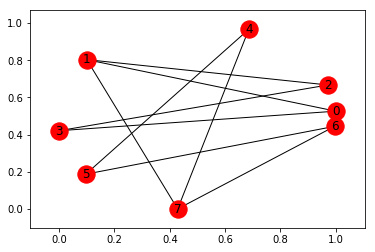

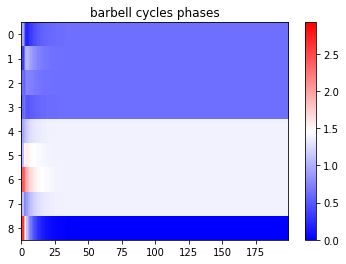

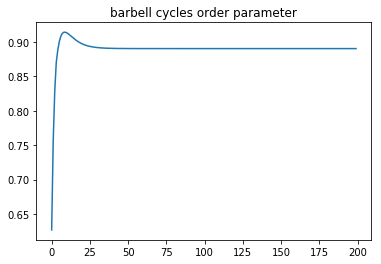

In [20]:
# 0-0 barbell cycles with single orientation
Nn=8
Ne=9
Nf=0
B0=np.zeros((Ne,Nn))
B0[0,:]=[-1, 1, 0, 0, 0, 0, 0, 0]
B0[1,:]=[0, -1, 1, 0, 0, 0, 0, 0]
B0[2,:]=[0, 0, -1, 1, 0, 0, 0, 0]
B0[3,:]=[1, 0, 0, -1, 0, 0, 0, 0]
B0[4,:]=[0, 0, 0, 0, -1, 1, 0, 0]
B0[5,:]=[0, 0, 0, 0, 0, -1, 1, 0]
B0[6,:]=[0, 0, 0, 0, 0, 0, -1, 1]
B0[7,:]=[0, 0, 0, 0, 1, 0, 0, -1]
B0[8,:]=[0, 1, 0, 0, 0, 0, 0, -1] #barbell
B1=np.zeros((Nf,Ne))

G=nx.from_numpy_matrix(B0.T.dot(B0)-np.diag(np.diag(B0.T.dot(B0))))
nx.draw_networkx(G)

# np.random.seed(seed=4444)

theta_0=np.pi*np.random.rand(Ne)
# theta_0=(np.random.rand(Ne)-0.5)*2

plotflow(theta_0,B0,B1,'barbell cycles')

In [21]:
def simplicial_kuramoto_full_theta_double(t, theta, B0d, B0dp, B0dm, B1d, B1dp, B1dm, a, omega_0):

    return omega_0-a*(B0d.dot(np.sin(B0d.T.dot(theta))))

def integrate_simplicial_kuramoto_full_theta_double(B0d, B0dp ,B0dm, B1d, B1dp, B1dm, theta_0, t_max, n_t, a, omega_0):
    
    return integ.solve_ivp(lambda t, theta: simplicial_kuramoto_full_theta_double(t, theta, B0d, B0dp ,B0dm, B1d, B1dp, B1dm, a, omega_0), [0, t_max], theta_0, t_eval = np.linspace(0, t_max, n_t),method='Radau',rtol=1.49012e-8,atol=1.49012e-8)

edges
[[0. 1.]
 [0. 3.]
 [1. 2.]
 [2. 3.]]
faces
[]
('\theta_0: ', array([ 0.09193799, -0.09193799,  0.09193799,  0.09193799, -0.09193799,
        0.09193799, -0.09193799, -0.09193799]))
('\theta_final: ', array([ 0.09193799, -0.09193799,  0.09193799,  0.09193799, -0.09193799,
        0.09193799, -0.09193799, -0.09193799]))
('\theta_final: ', array([0.09193799, 6.19124731, 0.09193799, 0.09193799, 6.19124731,
       0.09193799, 6.19124731, 6.19124731]))
('Div: ', array([0., 0., 0., 0.]))
('Curl: ', array([], dtype=float64))
('L1\theta: ', array([0., 0., 0., 0.]))
('L1\theta: ', array([0., 0., 0., 0.]))
('dim(Ker(L1)): ', 1)
('Ker(L1): ', array([[-0.5],
       [ 0.5],
       [-0.5],
       [-0.5]]))


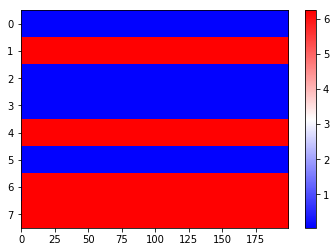

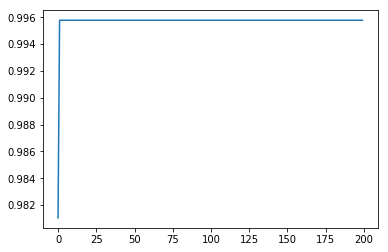

In [22]:
# Cycle with lift
Nn=10
G=nx.cycle_graph(Nn)

B0,B1=ntri(A)

# B0[1,0]=-B0[1,0]
# B0[1,-1]=-B0[1,-1]

Ne=B0.shape[0]
Nf=B1.shape[0]

V=np.concatenate((np.eye(Ne),-np.eye(Ne)),axis=0)
B0d=V.dot(B0)
B1d=B1.dot(V.T)
B0dp=(np.abs(B0d)+B0d)/2
B0dm=(np.abs(B0d)-B0d)/2
B1dp=(np.abs(B1d)+B1d)/2
B1dm=(np.abs(B1d)-B1d)/2

# np.random.seed(seed=4444)

# theta_0=np.pi*np.random.rand(Ne)
theta_0=(np.random.rand(Ne)-0.5)*1
theta_0d=V.dot(theta_0)
omega_0=np.ones(2*Ne)*0

a=1

t_max = 2000 #integration time
n_t = 200 #number of timepoints 

result=integrate_simplicial_kuramoto_full_theta_double(B0d, B0dp ,B0dm, B1d, B1dp, B1dm, theta_0d, t_max, n_t, a, omega_0)

times = result.t
theta = result.y
# theta=V.T.dot(theta)

plt.figure()
plt.imshow(np.mod(np.around(theta,10),np.around(2*np.pi,10)), aspect='auto',cmap='bwr')
plt.colorbar()

op=order_parameter(theta, 4, 1)
plt.figure()
plt.plot(op[0,:])

print('\theta_0: ',theta[:,-1])
print('\theta_final: ', theta[:,-1])
print('\theta_final: ', np.mod(np.around(theta[:,-1],10),np.around(2*np.pi,10)))

theta=V.T.dot(theta)
Div=np.mod(np.around(B0.T.dot(theta),10),np.around(2*np.pi,10))
Curl=np.mod(np.around(B1.dot(theta),10),np.around(2*np.pi,10))
print('Div: ', Div[:,-1])
print('Curl: ', Curl[:,-1])

L1=-B0.dot(B0.T)-B1.T.dot(B1)
print('L1\theta: ', L1.dot(theta[:,-1]))
print('L1\theta: ', np.mod(np.around(L1.dot(theta[:,-1]),10),np.around(2*np.pi,10)))
print('dim(Ker(L1)): ', null_space(L1).shape[1])
print('Ker(L1): ', null_space(L1))

# plt.figure()
# plt.imshow(Div, aspect='auto',cmap='bwr')
# plt.colorbar()
# plt.figure()
# plt.imshow(Curl, aspect='auto',cmap='bwr')
# plt.colorbar() 